In [145]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from datetime import date
import seaborn as sns
import plotly.express as px

In [146]:
# Import the data from kaggel into a data frame
df = pd.read_csv('../Employment/data/unemployed_population_1978-12_to_2023-07.csv') 
df

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,7/1/2023,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,6/1/2023,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,5/1/2023,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,4/1/2023,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,3/1/2023,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,4/1/1979,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,...,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
532,3/1/1979,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,...,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
533,2/1/1979,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,...,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
534,1/1/1979,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,...,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000


In [147]:
#clean the dataframe
df = df.drop_duplicates()
df = df.dropna()


See how unemployment rates have changed for different groups of people over time

In [148]:
df_age_group = df.iloc[:, 0:5]
df_age_group

,date,all,16-24,25-54,55-64
0,7/1/2023,3.6,7.8,3.1,2.4
1,6/1/2023,3.6,7.8,3.1,2.4
2,5/1/2023,3.6,7.9,3.0,2.4
3,4/1/2023,3.6,7.9,3.0,2.4
4,3/1/2023,3.6,8.0,3.0,2.5
...,...,...,...,...,...
531,4/1/1979,5.9,11.9,4.2,2.8
532,3/1/1979,6.0,12.0,4.3,2.8
533,2/1/1979,6.0,12.2,4.3,2.8
534,1/1/1979,6.1,12.3,4.3,2.9


In [149]:
df_age_group['date'] = pd.to_datetime(df_age_group['date'])
df_age_group['Year'] = df_age_group['date'].dt.year
df_age_group

,date,all,16-24,25-54,55-64,Year
0,2023-07-01,3.6,7.8,3.1,2.4,2023
1,2023-06-01,3.6,7.8,3.1,2.4,2023
2,2023-05-01,3.6,7.9,3.0,2.4,2023
3,2023-04-01,3.6,7.9,3.0,2.4,2023
4,2023-03-01,3.6,8.0,3.0,2.5,2023
...,...,...,...,...,...,...
531,1979-04-01,5.9,11.9,4.2,2.8,1979
532,1979-03-01,6.0,12.0,4.3,2.8,1979
533,1979-02-01,6.0,12.2,4.3,2.8,1979
534,1979-01-01,6.1,12.3,4.3,2.9,1979


In [150]:
df_age_group = df_age_group.groupby(['Year'],as_index=True)[['16-24','25-54','55-64']].mean()
df_age_group

,16-24,25-54,55-64
Year,,,
1978,12.400000,4.300000,2.900000
1979,11.950000,4.225000,2.808333
1980,13.008333,4.825000,3.016667
1981,14.733333,5.775000,3.591667
1982,16.541667,6.866667,4.525000
1983,18.091667,8.391667,5.683333
1984,15.333333,6.825000,4.916667
1985,13.700000,5.925000,4.383333
1986,13.475000,5.733333,4.158333


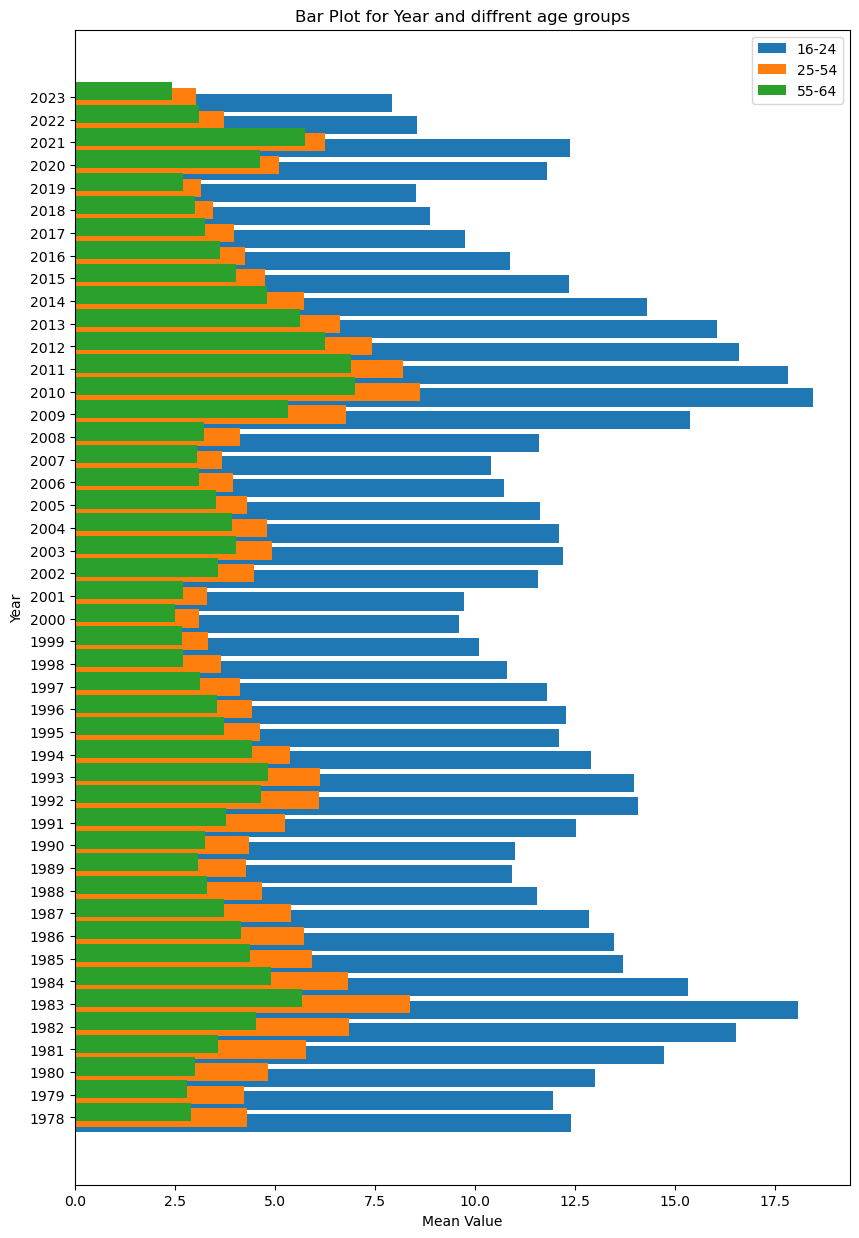

In [151]:
# Plot a bar chart for diffrent age groups


plt.figure(figsize=(10, 15))
y = df_age_group.index  # Assuming the index represents categories or labels
width = 0.25
plt.barh(y - width, df_age_group['16-24'],  label='16-24')
plt.barh(y, df_age_group['25-54'],  label='25-54')
plt.barh(y + width, df_age_group['55-64'],  label='55-64')


plt.ylabel('Year')
plt.xlabel('Mean Value')
plt.title('Bar Plot for Year and diffrent age groups')
plt.yticks(y)
plt.legend()
plt.show()






In [19]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
  (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
  regress_values = x_values * slope + intercept

  # Create line equation string
  line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

  # Create scatter and line plot  
  plt.scatter(x_values,y_values)
  plt.plot(x_values,regress_values,"r-")  

  #r-squared value
  print("Correlation Coefficient (r-value):" ,rvalue)
  print(f"The r-squared is: {rvalue**2}")

  # Label plot and annotate the line equation
  plt.annotate(line_eq,(regEQplotX,regEQplotY), fontsize=11, color="red")
  plt.xlabel('Latitude')
  plt.ylabel(f'{y_label}')
  plt.grid()

Correlation Coefficient (r-value): -0.16619070465504435
The r-squared is: 0.027619350313740177


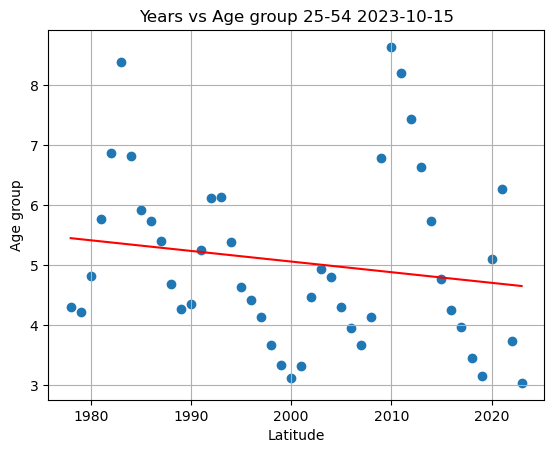

In [23]:
# Linear regression on age group 25-54
#set the data sets to compare
x_values = df_age_group.index
y_values = df_age_group["25-54"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "Age group"

#give the title
plt.title(f'Years vs Age group 25-54 on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): -0.30016606232451837
The r-squared is: 0.09009966497140665


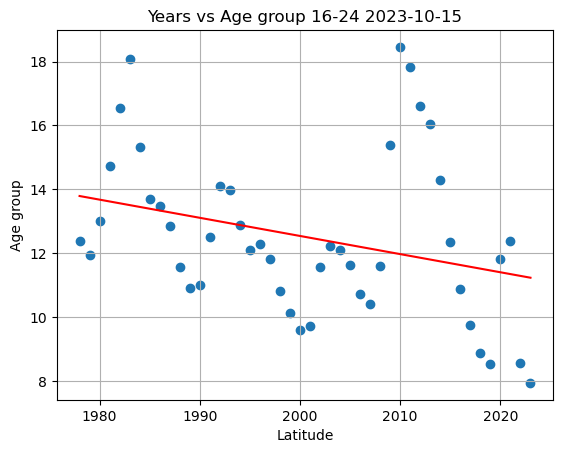

In [24]:
# Linear regression on age group 16-24
#set the data sets to compare
x_values = df_age_group.index
y_values = df_age_group["16-24"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "Age group"

#give the title
plt.title(f'Years vs Age group 16-24  on {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

Correlation Coefficient (r-value): 0.127970307475886
The r-squared is: 0.016376399595472806


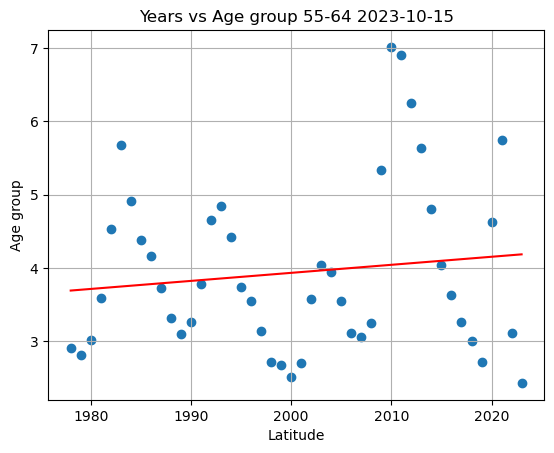

In [25]:
# Linear regression on age group 16-24
#set the data sets to compare
x_values = df_age_group.index
y_values = df_age_group["55-64"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "Age group"

#give the title
plt.title(f'Years vs Age group 55-64 {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

Look into how education levels can affect unemployment rates.

In [72]:
# Rename columns to make easier conversion later
#format: race|gender|education|age
column_mapping = {
    "all": "all|all|all|all",
    "16-24": "all|all|all|16_24",
    "25-54": "all|all|all|25_54",
    "55-64": "all|all|all|55_64",
    "65+": "all|all|all|65_",
    "less_than_hs": "all|all|less_than_hs|all",
    "high_school": "all|all|high_school|all",
    "some_college": "all|all|some_college|all",
    "bachelor's_degree": "all|all|bachelors_degree|all",
    "advanced_degree": "all|all|advanced_degree|all",
    "women": "all|women|all|all",
    "women_16-24": "all|women|all|16_24",
    "women_25-54": "all|women|all|25_54",
    "women_55-64": "all|women|all|55_64",
    "women_65+": "all|women|all|65_",
    "women_less_than_hs": "all|women|less_than_hs|all",
    "women_high_school": "all|women|high_school|all",
    "women_some_college": "all|women|some_college|all",
    "women_bachelor's_degree": "all|women|bachelors_degree|all",
    "women_advanced_degree": "all|women|advanced_degree|all",
    "men": "all|men|all|all",
    "men_16-24": "all|men|all|16_24",
    "men_25-54": "all|men|all|25_54",
    "men_55-64": "all|men|all|55_64",
    "men_65+": "all|men|all|65_",
    "men_less_than_hs": "all|men|less_than_hs|all",
    "men_high_school": "all|men|high_school|all",
    "men_some_college": "all|men|some_college|all",
    "men_bachelor's_degree": "all|men|bachelors_degree|all",
    "men_advanced_degree": "all|men|advanced_degree|all",
    "black": "black|all|all|all",
    "black_16-24": "black|all|all|16_24",
    "black_25-54": "black|all|all|25_54",
    "black_55-64": "black|all|all|55_64",
    "black_65+": "black|all|all|65_",
    "black_less_than_hs": "black|all|less_than_hs|all",
    "black_high_school": "black|all|high_school|all",
    "black_some_college": "black|all|some_college|all",
    "black_bachelor's_degree": "black|all|bachelors_degree|all",
    "black_advanced_degree": "black|all|advanced_degree|all",
    "black_women": "black|women|all|all",
    "black_women_16-24": "black|women|all|16_24",
    "black_women_25-54": "black|women|all|25_54",
    "black_women_55-64": "black|women|all|55_64",
    "black_women_65+": "black|women|all|65_",
    "black_women_less_than_hs": "black|women|less_than_hs|all",
    "black_women_high_school": "black|women|high_school|all",
    "black_women_some_college": "black|women|some_college|all",
    "black_women_bachelor's_degree": "black|women|bachelors_degree|all",
    "black_women_advanced_degree": "black|women|advanced_degree|all",
    "black_men": "black|men|all|all",
    "black_men_16-24": "black|men|all|16_24",
    "black_men_25-54": "black|men|all|25_54",
    "black_men_55-64": "black|men|all|55_64",
    "black_men_65+": "black|men|all|65_",
    "black_men_less_than_hs": "black|men|less_than_hs|all",
    "black_men_high_school": "black|men|high_school|all",
    "black_men_some_college": "black|men|some_college|all",
    "black_men_bachelor's_degree": "black|men|bachelors_degree|all",
    "black_men_advanced_degree": "black|men|advanced_degree|all",
    "hispanic": "hispanic|all|all|all",
    "hispanic_16-24": "hispanic|all|all|16_24",
    "hispanic_25-54": "hispanic|all|all|25_54",
    "hispanic_55-64": "hispanic|all|all|55_64",
    "hispanic_65+": "hispanic|all|all|65_",
    "hispanic_less_than_hs": "hispanic|all|less_than_hs|all",
    "hispanic_high_school": "hispanic|all|high_school|all",
    "hispanic_some_college": "hispanic|all|some_college|all",
    "hispanic_bachelor's_degree": "hispanic|all|bachelors_degree|all",
    "hispanic_advanced_degree": "hispanic|all|advanced_degree|all",
    "hispanic_women": "hispanic|women|all|all",
    "hispanic_women_16-24": "hispanic|women|all|16_24",
    "hispanic_women_25-54": "hispanic|women|all|25_54",
    "hispanic_women_55-64": "hispanic|women|all|55_64",
    "hispanic_women_65+": "hispanic|women|all|65_",
    "hispanic_women_less_than_hs": "hispanic|women|less_than_hs|all",
    "hispanic_women_high_school": "hispanic|women|high_school|all",
    "hispanic_women_some_college": "hispanic|women|some_college|all",
    "hispanic_women_bachelor's_degree": "hispanic|women|bachelors_degree|all",
    "hispanic_women_advanced_degree": "hispanic|women|advanced_degree|all",
    "hispanic_men": "hispanic|men|all|all",
    "hispanic_men_16-24": "hispanic|men|all|16_24",
    "hispanic_men_25-54": "hispanic|men|all|25_54",
    "hispanic_men_55-64": "hispanic|men|all|55_64",
    "hispanic_men_65+": "hispanic|men|all|65_",
    "hispanic_men_less_than_hs": "hispanic|men|less_than_hs|all",
    "hispanic_men_high_school": "hispanic|men|high_school|all",
    "hispanic_men_some_college": "hispanic|men|some_college|all",
    "hispanic_men_bachelor's_degree": "hispanic|men|bachelors_degree|all",
    "hispanic_men_advanced_degree": "hispanic|men|advanced_degree|all",
    "white": "white|all|all|all",
    "white_16-24": "white|all|all|16_24",
    "white_25-54": "white|all|all|25_54",
    "white_55-64": "white|all|all|55_64",
    "white_65+": "white|all|all|65_",
    "white_less_than_hs": "white|all|less_than_hs|all",
    "white_high_school": "white|all|high_school|all",
    "white_some_college": "white|all|some_college|all",
    "white_bachelor's_degree": "white|all|bachelors_degree|all",
    "white_advanced_degree": "white|all|advanced_degree|all",
    "white_women": "white|women|all|all",
    "white_women_16-24": "white|women|all|16_24",
    "white_women_25-54": "white|women|all|25_54",
    "white_women_55-64": "white|women|all|55_64",
    "white_women_65+": "white|women|all|65_",
    "white_women_less_than_hs": "white|women|less_than_hs|all",
    "white_women_high_school": "white|women|high_school|all",
    "white_women_some_college": "white|women|some_college|all",
    "white_women_bachelor's_degree": "white|women|bachelors_degree|all",
    "white_women_advanced_degree": "white|women|advanced_degree|all",
    "white_men": "white|men|all|all",
    "white_men_16-24": "white|men|all|16_24",
    "white_men_25-54": "white|men|all|25_54",
    "white_men_55-64": "white|men|all|55_64",
    "white_men_65+": "white|men|all|65_",
    "white_men_less_than_hs": "white|men|less_than_hs|all",
    "white_men_high_school": "white|men|high_school|all",
    "white_men_some_college": "white|men|some_college|all",
    "white_men_bachelor's_degree": "white|men|bachelors_degree|all",
    "white_men_advanced_degree": "white|men|advanced_degree|all"
}

df = df.rename(columns=column_mapping)

# convert wide to narrow dataframe

df_new = pd.melt(df, id_vars=['date', 'population_over_16'], var_name='Combined_code', value_name='Unemployment')


df_new['Race'] = df_new['Combined_code'].apply(lambda x: x.split('|')[0])
df_new['Gender'] = df_new['Combined_code'].apply(lambda x: x.split('|')[1])
df_new['Education'] = df_new['Combined_code'].apply(lambda x: x.split('|')[2])
df_new['Age'] = df_new['Combined_code'].apply(lambda x: x.split('|')[3])

# # extract year from date
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['Year'] = df_new['date'].dt.year

# # Select only specific columns of interest
selected_cols = ['Unemployment', 'Race', 'Gender','Education', 'Age', 'Year']
df_new = df_new[selected_cols]

# print(df_new.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df_new.to_csv('df_new.csv')

Correlation Coefficient (r-value): -0.08125285506033046
The r-squared is: 0.00660202645545507


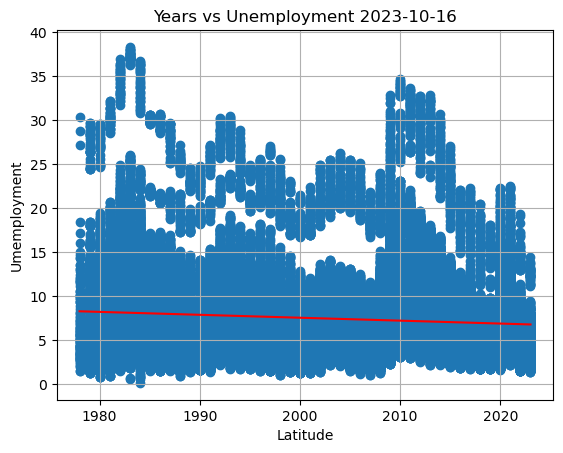

In [163]:
# Linear regression on age group 16-24
#set the data sets to compare
x_values = df_new['Year']
y_values = df_new["Unemployment"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "Umemployment"

#give the title
plt.title(f'Years vs Unemployment {date.today()}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
#plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {date.today()}.png')
plt.show()

In [109]:
values_to_filter = ['advanced_degree','bachelors_degree','high_school','less_than_hs']
filtered_df = df_new[df_new['Education'].isin(values_to_filter)]
filtered_df

,Unemployment,Race,Gender,Education,Age,Year
2680,7.0,all,all,less_than_hs,all,2023
2681,7.1,all,all,less_than_hs,all,2023
2682,7.1,all,all,less_than_hs,all,2023
2683,7.1,all,all,less_than_hs,all,2023
2684,7.1,all,all,less_than_hs,all,2023
...,...,...,...,...,...,...
64315,1.3,white,men,advanced_degree,all,1979
64316,1.3,white,men,advanced_degree,all,1979
64317,1.4,white,men,advanced_degree,all,1979
64318,1.4,white,men,advanced_degree,all,1979


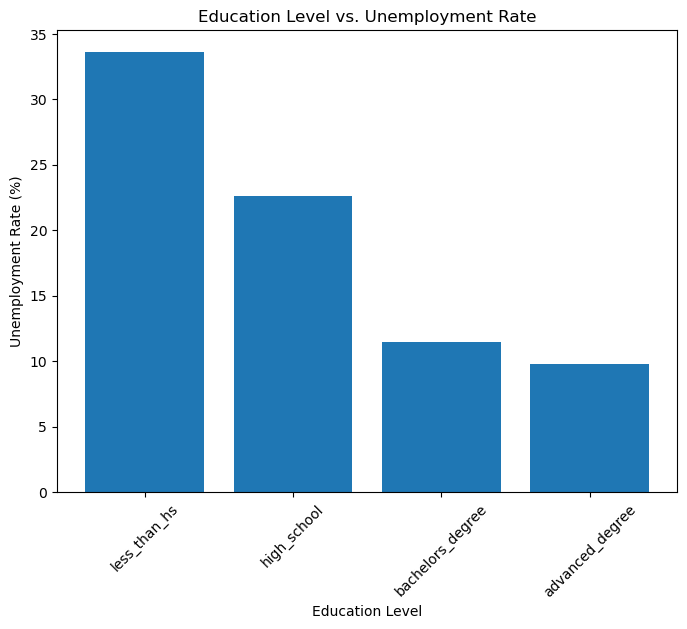

In [80]:
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.bar(filtered_df['Education'], filtered_df['Unemployment'])
plt.xlabel('Education Level')
plt.ylabel('Unemployment Rate (%)')
plt.title('Education Level vs. Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

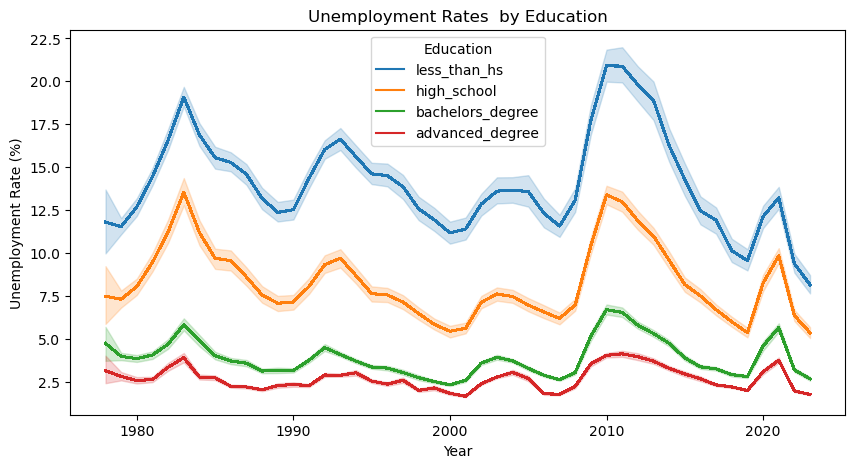

In [124]:
plt.figure(figsize=(10, 5)) 

sns.lineplot(filtered_df, x='Year', y='Unemployment', hue='Education',antialiased=False)

plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rates  by Education')

# Show the legend
#plt.legend(title='Education Level')

# Show the plot
plt.show()

In [160]:
values_to_filter = ['white','black','hispanic','all']
filtered_df_by_race = df_new[df_new['Race'].isin(values_to_filter)]


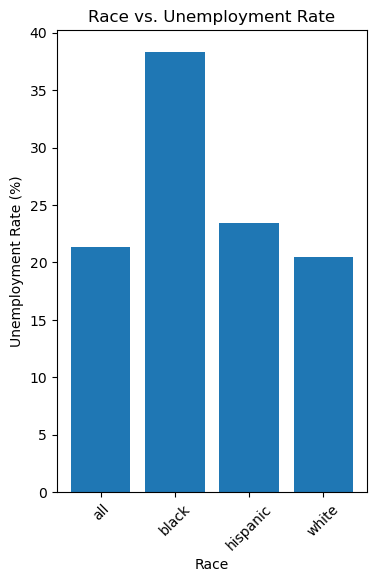

In [161]:
plt.figure(figsize=(4, 6))  # Set the figure size (width, height)
plt.bar(filtered_df_by_race['Race'], filtered_df_by_race['Unemployment'])
plt.xlabel('Race')
plt.ylabel('Unemployment Rate (%)')
plt.title('Race vs. Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

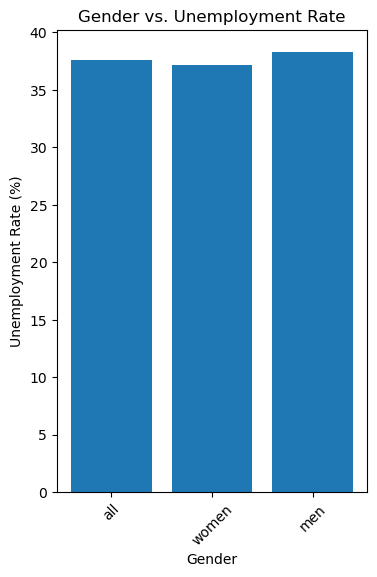

In [164]:
plt.figure(figsize=(4, 6))  # Set the figure size (width, height)
plt.bar(filtered_df_by_race['Gender'], filtered_df_by_race['Unemployment'])
plt.xlabel('Gender')
plt.ylabel('Unemployment Rate (%)')
plt.title('Gender vs. Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

Text(0.5, 1.0, 'Unemployment Rates by Gender and Race')

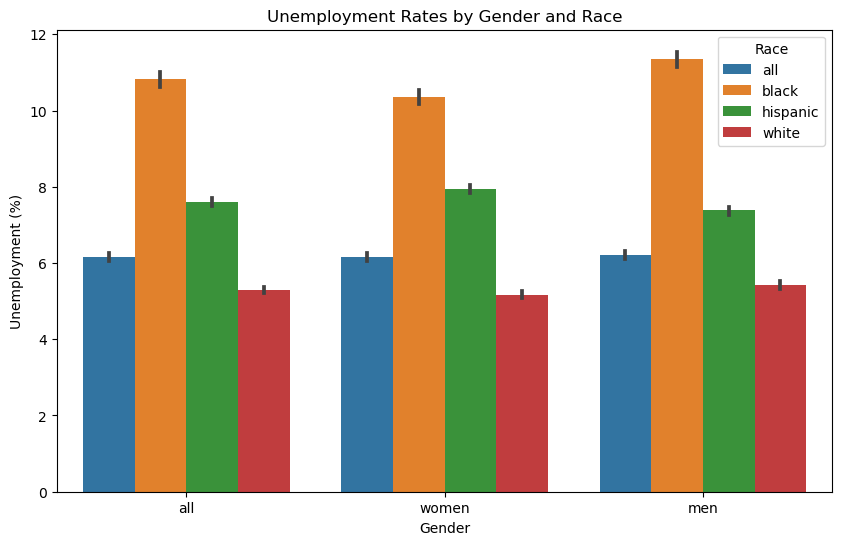

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_new, x='Gender', y='Unemployment', hue='Race')

# Set axis labels and title
plt.xlabel('Gender')
plt.ylabel('Unemployment (%)')
plt.title('Unemployment Rates by Gender and Race')
